<img src = "https://i.imgur.com/FnywAgO.jpg" align = "center"></a>

<h1><font size = 5> FINAL PROJECT</font></h1>

Oleh :
1. Luthfiana Ratnawati
2. Putri Andriani
3. Yolla Faradhilla

----------------------------

<h1><font size = 6> KLASIFIKASI PAKAIAN DAN AKSESORIS</font></h1>

### DATASET

**Download Dataset**

In [ ]:
!mkdir data
!mkdir data/fashion
!wget -O data/fashion/train-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget -O data/fashion/train-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget -O data/fashion/t10k-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget -O data/fashion/t10k-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘data/fashion’: File exists
--2019-08-08 10:42:08--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.72.150
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.72.150|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘data/fashion/train-images-idx3-ubyte.gz’

data/fashion/train- 100%[===================>]  25.20M  16.9MB/s    in 1.5s    

2019-08-08 10:42:09 (16.9 MB/s) - ‘data/fashion/train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2019-08-08 10:42:11--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazo

**Import Dataset**

### PREPROCESSING

**Import Dataset**

In [ ]:
# Import libraries
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import time
# Import Fashion MNIST
fashion_mnist = input_data.read_data_sets('data/fashion', one_hot=True)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


**Bentuk Dataset**

In [ ]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=fashion_mnist.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=fashion_mnist.train.labels.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=fashion_mnist.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=fashion_mnist.test.labels.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


**Visualisasi Dataset**

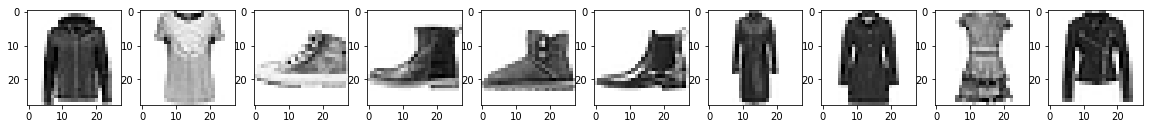

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
f, a = plt.subplots(1, 10, figsize=(20, 20))
for i in range(10):
    a[i].imshow(np.reshape(fashion_mnist.train.images[i], (28, 28)), cmap='Greys')

### TRAINING

In [ ]:
sess = tf.InteractiveSession()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
x  = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [ ]:
width = 28 # width of the image in pixels 
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image 
class_output = 10 # number of possible classifications for the problem

In [ ]:
x  = tf.placeholder(tf.float32, shape=[None, flat])
y_ = tf.placeholder(tf.float32, shape=[None, class_output])

In [ ]:
x_image = tf.reshape(x, [-1,28,28,1])  
x_image

<tf.Tensor 'Reshape_9:0' shape=(?, 28, 28, 1) dtype=float32>

In [ ]:
w1 = tf.Variable(tf.truncated_normal([3, 3, 1, 16], stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[16])) # need 32 biases for 32 outputs
convolve1= tf.nn.conv2d(x_image, w1, strides=[1, 1, 1, 1], padding='SAME') + b1
h_conv1 = tf.nn.relu(convolve1)
conv1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2
conv1

<tf.Tensor 'MaxPool_16:0' shape=(?, 14, 14, 16) dtype=float32>

In [ ]:
w2 = tf.Variable(tf.truncated_normal([5, 5, 16, 32], stddev=0.1))
b2 = tf.Variable(tf.constant(0.1, shape=[32])) # need 64 biases for 64 outputs
convolve2= tf.nn.conv2d(conv1, w2, strides=[1, 1, 1, 1], padding='SAME') + b2
h_conv2 = tf.nn.relu(convolve2)
conv2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2
conv2

<tf.Tensor 'MaxPool_17:0' shape=(?, 7, 7, 32) dtype=float32>

In [ ]:
w3 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b3 = tf.Variable(tf.constant(0.1, shape=[64])) # need 128 biases for 64 outputs
convolve3= tf.nn.conv2d(conv2, w3, strides=[1, 1, 1, 1], padding='SAME') + b3
h_conv3 = tf.nn.relu(convolve3)
conv3 = tf.nn.max_pool(h_conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2
conv3

<tf.Tensor 'MaxPool_18:0' shape=(?, 4, 4, 64) dtype=float32>

In [ ]:
layer2_matrix = tf.reshape(conv3, [-1, 4*4*64])
wfc1 = tf.Variable(tf.truncated_normal([4 * 4 * 64, 1024], stddev=0.1))
bfc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs
fcl=tf.matmul(layer2_matrix, wfc1) + bfc1
h_fc1 = tf.nn.relu(fcl)
h_fc1

<tf.Tensor 'Relu_24:0' shape=(?, 1024) dtype=float32>

In [ ]:
keep_prob = tf.placeholder(tf.float32)
layer_drop = tf.nn.dropout(h_fc1, keep_prob)
layer_drop

<tf.Tensor 'dropout_5/mul_1:0' shape=(?, 1024) dtype=float32>

In [ ]:
wfc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1)) #1024 neurons
bfc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]
fc=tf.matmul(layer_drop, wfc2) + bfc2

In [ ]:
y_CNN= tf.nn.softmax(fc)
y_CNN

<tf.Tensor 'Softmax_5:0' shape=(?, 10) dtype=float32>

In [ ]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_CNN))
train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_CNN,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())

In [ ]:
train_accuracy = list()
test_accuracy=list()
loss = list()
a=0
for i in range(4000):
    start = time.time()
    batch = fashion_mnist.train.next_batch(512)
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
    end = time.time()
    if i%100 == 0:
        train_accuracy = np.append(train_accuracy, sess.run(accuracy, feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0}))
        loss = np.append(loss, sess.run(cross_entropy, feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0}))
        test_accuracy = np.append(test_accuracy, accuracy.eval(feed_dict={x:fashion_mnist.test.images, y_: fashion_mnist.test.labels, keep_prob: 1.0}))
        print("Step", str(i),", Loss", "{:.3f}".format(loss[a]), ", Training Accuracy", "{:.3f}".format(train_accuracy[a]),", Test Accuracy", "{:.3f}".format(test_accuracy[a]),", Process Time" , "{:.3f}".format(end - start) )
        a=a+1

Step 0 , Loss 2.351 , Training Accuracy 0.102 , Test Accuracy 0.100 , Process Time 0.908
Step 100 , Loss 1.906 , Training Accuracy 0.559 , Test Accuracy 0.542 , Process Time 0.704
Step 200 , Loss 1.754 , Training Accuracy 0.709 , Test Accuracy 0.732 , Process Time 0.682
Step 300 , Loss 1.603 , Training Accuracy 0.857 , Test Accuracy 0.842 , Process Time 0.688
Step 400 , Loss 1.607 , Training Accuracy 0.855 , Test Accuracy 0.858 , Process Time 0.677
Step 500 , Loss 1.586 , Training Accuracy 0.875 , Test Accuracy 0.877 , Process Time 0.691
Step 600 , Loss 1.591 , Training Accuracy 0.873 , Test Accuracy 0.882 , Process Time 0.684
Step 700 , Loss 1.545 , Training Accuracy 0.914 , Test Accuracy 0.887 , Process Time 0.681
Step 800 , Loss 1.561 , Training Accuracy 0.906 , Test Accuracy 0.889 , Process Time 0.679
Step 900 , Loss 1.536 , Training Accuracy 0.928 , Test Accuracy 0.890 , Process Time 0.685
Step 1000 , Loss 1.560 , Training Accuracy 0.906 , Test Accuracy 0.888 , Process Time 0.684


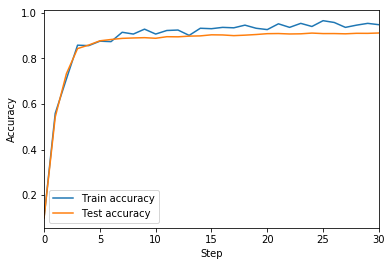

In [ ]:
plt.plot(train_accuracy, label='Train accuracy')
plt.plot(test_accuracy, label='Test accuracy')
plt.xlabel('Step')
plt.xlim(0, 30, 1)
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### EVALUATING

Test accuracy result :

In [ ]:
print("test accuracy %g"%accuracy.eval(feed_dict={x: fashion_mnist.test.images, y_: fashion_mnist.test.labels, keep_prob: 1.0}))

test accuracy 0.9137


### VISUALIZATION

In [ ]:
kernels = sess.run(tf.reshape(tf.transpose(w1, perm=[2, 3, 0,1]),[16,-1]))

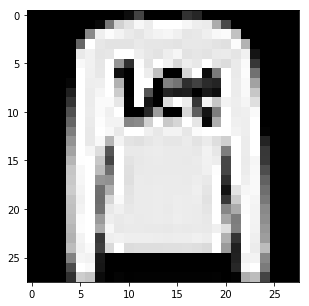

In [ ]:
import numpy as np
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sampleimage = fashion_mnist.test.images[1]
plt.imshow(np.reshape(sampleimage,[28,28]), cmap="gray")

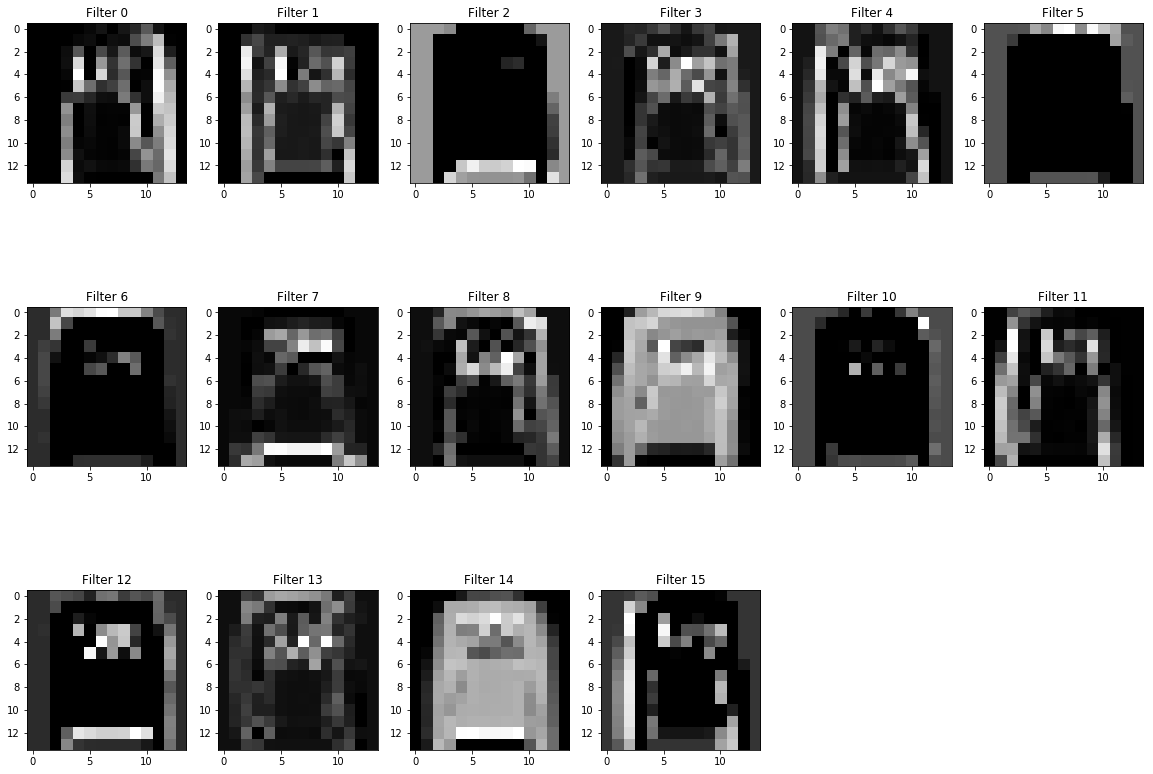

In [ ]:
ActivatedUnits = sess.run(conv1,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 6
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

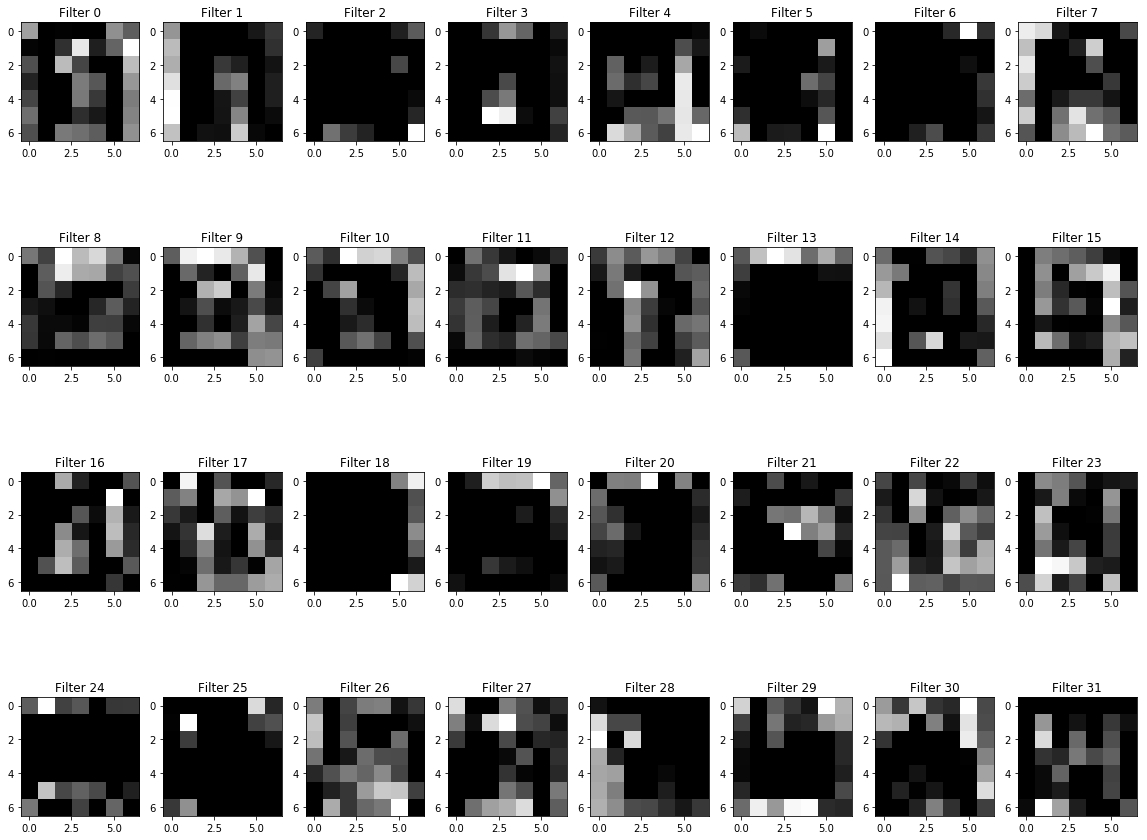

In [ ]:
ActivatedUnits = sess.run(conv2,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

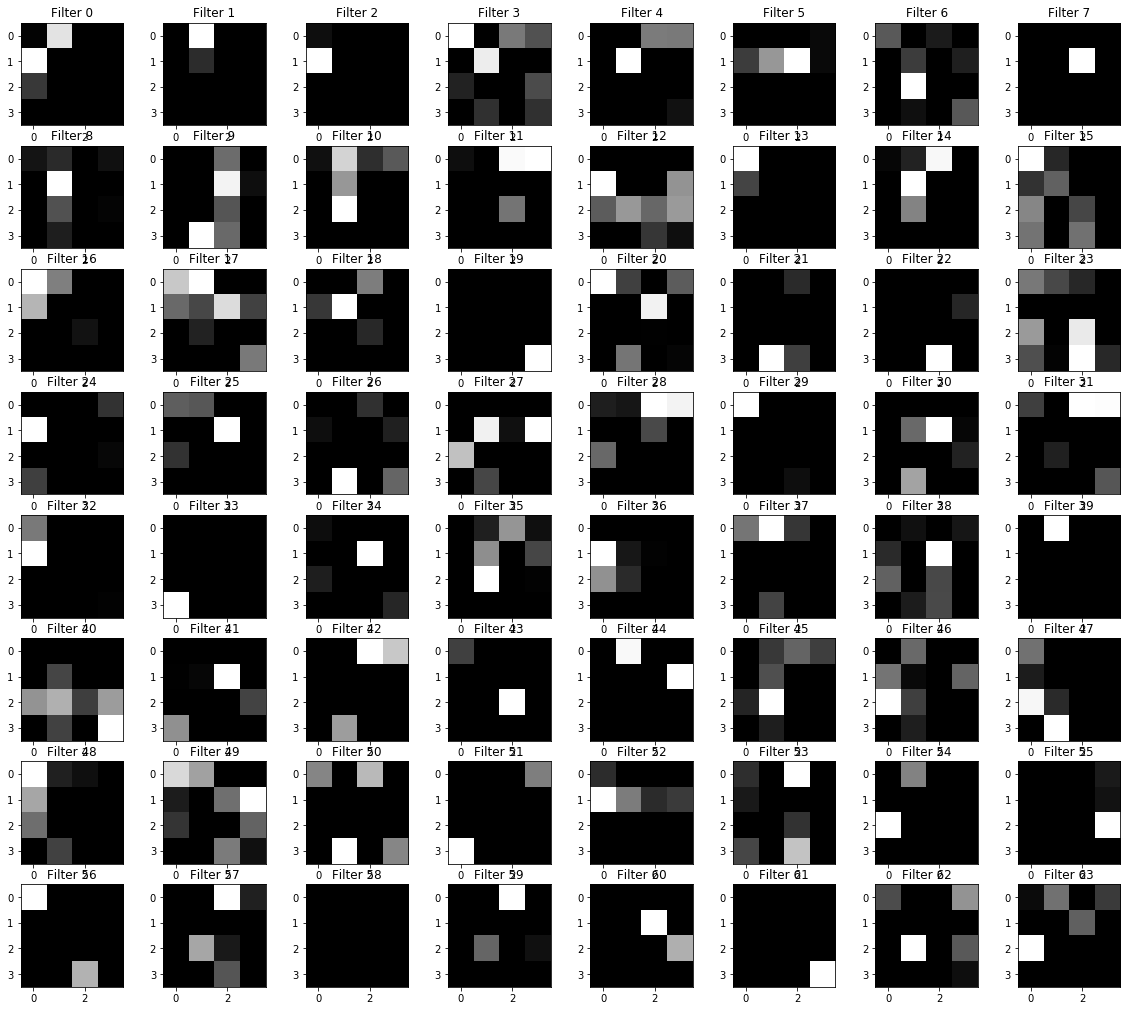

In [ ]:
ActivatedUnits = sess.run(conv3,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

In [ ]:
sess.close() #finish the session